# Import Modules & CSV File

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
df = pd.read_csv('LoansTrainingSet.csv')
df.head()

C:\Users\New User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [8]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [9]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


# Data Cleaning

## Clean Column Titles

In [10]:
col = list(df.columns)
col

['Loan ID',
 'Customer ID',
 'Loan Status',
 'Current Loan Amount',
 'Term',
 'Credit Score',
 'Years in current job',
 'Home Ownership',
 'Annual Income',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [11]:
for i in range(len(col)):
    col[i] = col[i].lower()
    for l in col[i]:
        if l == " ":
            col[i] = col[i].replace(l,"_")
col

['loan_id',
 'customer_id',
 'loan_status',
 'current_loan_amount',
 'term',
 'credit_score',
 'years_in_current_job',
 'home_ownership',
 'annual_income',
 'purpose',
 'monthly_debt',
 'years_of_credit_history',
 'months_since_last_delinquent',
 'number_of_open_accounts',
 'number_of_credit_problems',
 'current_credit_balance',
 'maximum_open_credit',
 'bankruptcies',
 'tax_liens']

In [12]:
df.columns = col
df.head(1)

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0


## Format Data

### Loan Status

In [13]:
df['loan_status'].unique() 
# This is the target feature.
# Make this binary.

array(['Fully Paid', 'Charged Off'], dtype=object)

In [14]:
d = {'Fully Paid':1, 'Charged Off':0}

In [15]:
df['loan_status'] = df['loan_status'].map(d)

### Term

In [16]:
df['term'].unique()
# Make this binary.

array(['Short Term', 'Long Term'], dtype=object)

In [17]:
d = {'Short Term':1, 'Long Term':0}

In [18]:
df['term'] = df['term'].map(d)

### Years in Current Job

In [19]:
df['years_in_current_job'].unique()
# Make this numeric (int).
# Remove "years" from all values.
# Ask about "10+ years" and "< 1 year".

array(['10+ years', '4 years', '6 years', '5 years', 'n/a', '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'], dtype=object)

In [20]:
a = []
for i in range(len(df)):
    b = df['years_in_current_job'][i].split()[0]
    a.append(b)
df['years_in_current_job'] = a

In [21]:
df['years_in_current_job'].unique()

array(['10+', '4', '6', '5', 'n/a', '3', '2', '<', '1', '7', '9', '8'], dtype=object)

In [22]:
d = {'<':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10+':10}

In [23]:
df['years_in_current_job'] = df['years_in_current_job'].map(d)

In [24]:
df['years_in_current_job'].unique()

array([ 10.,   4.,   6.,   5.,  nan,   3.,   2.,   0.,   1.,   7.,   9.,
         8.])

### Home Ownership

In [25]:
df['home_ownership'].unique()
# Make all values lower case.
# Combine "Home Mortgage" and "HomeMortgage".
# Change " "  to "_" for each value.

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [26]:
for i in range(len(df)):
    if df['home_ownership'][i] == 'HaveMortgage':
        df['home_ownership'][i] = 'Home Mortgage'

C:\Users\New User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: x.lower())

In [28]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: x.replace(" ","_"))

In [29]:
df['home_ownership'].unique()

array(['home_mortgage', 'own_home', 'rent'], dtype=object)

### Purpose

In [30]:
df['purpose'].unique()
# Make all values lower case.
# Combine "other" and "Other".
# Change " "  to "_" for each value.

array(['Debt Consolidation', 'other', 'Business Loan', 'Home Improvements',
       'Buy House', 'Other', 'Buy a Car', 'Medical Bills', 'Take a Trip',
       'Educational Expenses'], dtype=object)

In [31]:
df['purpose'].nunique()

10

In [32]:
df['purpose'] = df['purpose'].apply(lambda x: x.lower())

In [33]:
df['purpose'] = df['purpose'].apply(lambda x: x.replace(" ","_"))

In [34]:
df['purpose'].unique()

array(['debt_consolidation', 'other', 'business_loan', 'home_improvements',
       'buy_house', 'buy_a_car', 'medical_bills', 'take_a_trip',
       'educational_expenses'], dtype=object)

In [35]:
df['purpose'].nunique()

9

### Monthly Debt

In [36]:
df['monthly_debt'].head(5)
# Make numeric (float).
# Remove "$" from all values.

0       $584.03
1    $1,106.04 
2    $1,321.85 
3       $751.92
4       $355.18
Name: monthly_debt, dtype: object

In [37]:
df['monthly_debt'] = df['monthly_debt'].apply(lambda x: x[1:])

In [38]:
df['monthly_debt'] = df['monthly_debt'].apply(lambda x: x.replace(",",""))

In [39]:
df['monthly_debt'] = df['monthly_debt'].astype(float)

In [40]:
df['monthly_debt'].head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: monthly_debt, dtype: float64

## Fill Missing Data

In [41]:
df.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10.0,home_mortgage,33694.0,debt_consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,1,734.0,4.0,home_mortgage,42269.0,other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,1,747.0,10.0,home_mortgage,90126.0,debt_consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,1,747.0,10.0,own_home,38072.0,debt_consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,1,746.0,4.0,rent,50025.0,debt_consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [42]:
df.corr()

,loan_status,current_loan_amount,term,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
loan_status,1.000000,0.269804,0.183811,-0.440307,0.004924,0.070328,-0.016609,0.035548,0.023541,-0.020787,-0.010179,0.008838,0.001154,-0.012585
current_loan_amount,0.269804,1.000000,0.048366,-0.139743,0.005796,0.024069,-0.001928,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
term,0.183811,0.048366,1.000000,-0.063124,-0.067936,-0.064219,-0.151294,-0.035773,0.012107,-0.080506,0.019326,-0.090077,0.021534,0.002832
credit_score,-0.440307,-0.139743,-0.063124,1.000000,-0.000818,-0.033221,0.005518,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
years_in_current_job,0.004924,0.005796,-0.067936,-0.000818,1.000000,0.070275,0.123843,0.221534,-0.006778,0.047358,0.041390,0.091268,0.043872,0.007848
annual_income,0.070328,0.024069,-0.064219,-0.033221,0.070275,1.000000,0.454638,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
monthly_debt,-0.016609,-0.001928,-0.151294,0.005518,0.123843,0.454638,1.000000,0.188646,-0.056377,0.410416,-0.052792,0.472581,-0.078440,0.020557
years_of_credit_history,0.035548,0.014725,-0.035773,-0.011658,0.221534,0.146859,0.188646,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
months_since_last_delinquent,0.023541,0.003488,0.012107,-0.007994,-0.006778,-0.059675,-0.056377,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
number_of_open_accounts,-0.020787,-0.003094,-0.080506,0.008124,0.047358,0.140463,0.410416,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754


In [43]:
def miss():
    missing = df.isnull().sum()
    return missing[missing>0]

In [44]:
miss()

credit_score                     61676
years_in_current_job             11476
annual_income                    61676
months_since_last_delinquent    140383
bankruptcies                       529
tax_liens                           23
dtype: int64

### Credit Score

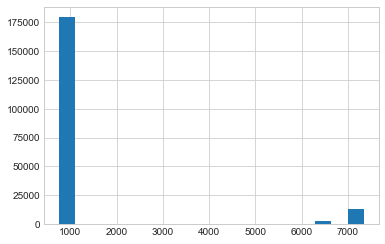

In [45]:
df['credit_score'].hist(rwidth=0.5)

In [46]:
df['credit_score'].agg(('min', 'max', 'mean', 'median'))

min        585.000000
max       7510.000000
mean      1251.116099
median     733.000000
Name: credit_score, dtype: float64

In [47]:
df['credit_score'] = df['credit_score'].astype(str)

In [48]:
df['credit_score'] = df['credit_score'].apply(lambda x: x[:3])

In [49]:
df['credit_score'] = df['credit_score'].astype(float)

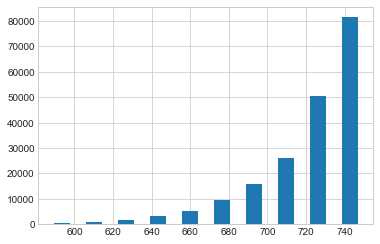

In [50]:
df['credit_score'].hist(rwidth=0.5)

In [51]:
df['credit_score'].agg(('min', 'max', 'mean', 'median'))

min       585.000000
max       751.000000
mean      721.203197
median    730.000000
Name: credit_score, dtype: float64

In [52]:
df[df['credit_score'].isnull()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,0,24613,0,NaN,6.0,rent,NaN,business_loan,542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,1,10036,1,NaN,5.0,rent,NaN,debt_consolidation,386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,0,17980,1,NaN,0.0,own_home,NaN,debt_consolidation,597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,0,16929,0,NaN,3.0,home_mortgage,NaN,debt_consolidation,745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,1,7228,1,NaN,3.0,home_mortgage,NaN,debt_consolidation,439.56,17.8,NaN,13,1,8488,15866,1.0,0.0
26,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,1,4612,1,NaN,10.0,rent,NaN,debt_consolidation,262.27,14.0,NaN,4,0,8919,9330,0.0,0.0
38,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,1,6114,1,NaN,NaN,home_mortgage,NaN,debt_consolidation,206.97,17.8,21.0,8,1,5772,13975,1.0,0.0
46,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,0,21160,0,NaN,5.0,home_mortgage,NaN,debt_consolidation,1290.98,20.8,NaN,28,0,28175,51227,0.0,0.0
56,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,0,6463,1,NaN,1.0,own_home,NaN,debt_consolidation,633.29,19.9,74.0,9,0,8025,24317,0.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,1,7068,1,NaN,NaN,own_home,NaN,other,425.68,21.3,NaN,7,1,4178,6850,1.0,0.0


In [53]:
gby = df.groupby('number_of_open_accounts')['credit_score'].median()
gby

number_of_open_accounts
0     661.0
1     726.0
2     725.0
3     725.0
4     729.0
5     731.0
6     731.0
7     731.0
8     731.0
9     731.0
10    730.0
11    730.0
12    730.0
13    730.0
14    730.0
15    730.0
16    729.0
17    729.0
18    729.0
19    729.0
20    729.0
21    730.0
22    727.0
23    727.0
24    727.0
25    723.0
26    719.0
27    724.0
28    724.0
29    720.0
30    720.5
31    723.5
32    722.0
33    720.0
34    717.0
35    718.0
36    720.0
37    732.0
38    709.5
39    724.0
40    736.0
41    732.0
42    729.0
43    715.0
44    712.5
45    676.0
46    711.5
47    746.0
48    713.0
49    642.0
50    687.0
51    746.0
52    744.5
53    725.5
54    725.0
55    743.0
56    721.0
58      NaN
76    670.0
Name: credit_score, dtype: float64

In [54]:
df['credit_score'] = df.groupby('number_of_open_accounts')['credit_score'].transform(lambda x: x.fillna(x.median()))

In [55]:
df['credit_score']

0         741.0
1         734.0
2         747.0
3         747.0
4         746.0
5         716.0
6         664.0
7         731.0
8         731.0
9         733.0
10        742.0
11        742.0
12        731.0
13        701.0
14        701.0
15        701.0
16        744.0
17        744.0
18        729.0
19        729.0
20        730.0
21        734.0
22        730.0
23        745.0
24        734.0
25        733.0
26        729.0
27        728.0
28        724.0
29        692.0
          ...  
256954    742.0
256955    727.0
256956    737.0
256957    743.0
256958    742.0
256959    731.0
256960    687.0
256961    726.0
256962    730.0
256963    738.0
256964    715.0
256965    727.0
256966    725.0
256967    737.0
256968    738.0
256969    738.0
256970    734.0
256971    746.0
256972    746.0
256973    729.0
256974    722.0
256975    700.0
256976    700.0
256977    717.0
256978    717.0
256979    729.0
256980    737.0
256981    746.0
256982    746.0
256983    678.0
Name: credit_score, Leng

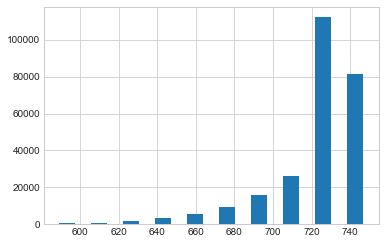

In [56]:
df['credit_score'].hist(rwidth=0.5)

In [57]:
miss()

credit_score                         2
years_in_current_job             11476
annual_income                    61676
months_since_last_delinquent    140383
bankruptcies                       529
tax_liens                           23
dtype: int64

In [58]:
df[df['credit_score'].isnull()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
186285,b946a57a-3a61-4677-aa7d-01792598ce78,4f27acfa-3369-4c07-9267-45ee1fc4b928,1,35697,1,NaN,10.0,home_mortgage,NaN,debt_consolidation,1589.34,13.9,NaN,58,0,38756,139914,0.0,0.0
201049,c8041dd1-334c-470b-839f-8b77ce018e4a,1a8ed2ef-ab47-43ca-b8d7-9b1b7f269285,1,20658,1,NaN,3.0,home_mortgage,NaN,debt_consolidation,2592.05,28.9,NaN,58,0,14977,176198,0.0,0.0


In [59]:
gby = df.groupby('number_of_credit_problems')['credit_score'].median()
gby

number_of_credit_problems
0     730.0
1     730.0
2     729.0
3     729.0
4     726.0
5     729.0
6     730.5
7     730.5
8     728.0
9     722.0
10    736.0
11    721.5
Name: credit_score, dtype: float64

In [60]:
df['credit_score'].fillna(gby[0], inplace=True)

In [61]:
miss()

years_in_current_job             11476
annual_income                    61676
months_since_last_delinquent    140383
bankruptcies                       529
tax_liens                           23
dtype: int64

### Years in Current Job

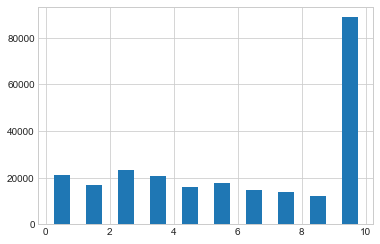

In [62]:
df['years_in_current_job'].hist(rwidth=0.5)

In [63]:
df['years_in_current_job'].agg(('min', 'max', 'mean', 'median'))

min        0.000000
max       10.000000
mean       5.869401
median     6.000000
Name: years_in_current_job, dtype: float64

In [64]:
gby1 = df.groupby(['purpose'])['years_in_current_job'].median()
# Use Credit History
gby1

purpose
business_loan           5.0
buy_a_car               4.0
buy_house               5.0
debt_consolidation      6.0
educational_expenses    2.0
home_improvements       7.0
medical_bills           6.0
other                   5.0
take_a_trip             6.0
Name: years_in_current_job, dtype: float64

In [65]:
df['years_in_current_job'] = df.groupby(['purpose'])['years_in_current_job']\
.transform(lambda x: x.fillna(x.median()))

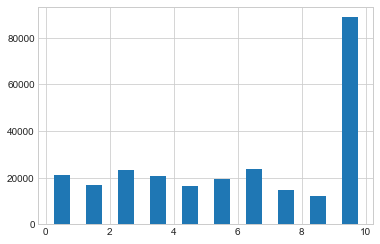

In [66]:
df['years_in_current_job'].hist(bins=10, rwidth=0.5)

In [67]:
miss()

annual_income                    61676
months_since_last_delinquent    140383
bankruptcies                       529
tax_liens                           23
dtype: int64

### Annual Income

In [68]:
df.corr()

,loan_status,current_loan_amount,term,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
loan_status,1.000000,0.269804,0.183811,0.230722,0.004799,0.070328,-0.016609,0.035548,0.023541,-0.020787,-0.010179,0.008838,0.001154,-0.012585
current_loan_amount,0.269804,1.000000,0.048366,0.044787,0.005684,0.024069,-0.001928,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
term,0.183811,0.048366,1.000000,0.420827,-0.066715,-0.064219,-0.151294,-0.035773,0.012107,-0.080506,0.019326,-0.090077,0.021534,0.002832
credit_score,0.230722,0.044787,0.420827,1.000000,-0.015658,0.012355,-0.082029,0.072971,0.039662,-0.045886,-0.049864,-0.014994,-0.037103,-0.023989
years_in_current_job,0.004799,0.005684,-0.066715,-0.015658,1.000000,0.069493,0.121743,0.209676,-0.006645,0.046511,0.040119,0.089928,0.042484,0.007613
annual_income,0.070328,0.024069,-0.064219,0.012355,0.069493,1.000000,0.454638,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
monthly_debt,-0.016609,-0.001928,-0.151294,-0.082029,0.121743,0.454638,1.000000,0.188646,-0.056377,0.410416,-0.052792,0.472581,-0.078440,0.020557
years_of_credit_history,0.035548,0.014725,-0.035773,0.072971,0.209676,0.146859,0.188646,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
months_since_last_delinquent,0.023541,0.003488,0.012107,0.039662,-0.006645,-0.059675,-0.056377,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
number_of_open_accounts,-0.020787,-0.003094,-0.080506,-0.045886,0.046511,0.140463,0.410416,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754


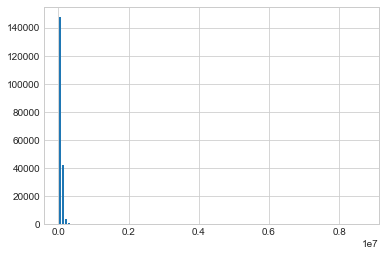

In [69]:
df['annual_income'].hist(bins=100, rwidth=0.5)

In [70]:
df['annual_income'].agg(('min', 'max', 'mean', 'median'))

min       0.000000e+00
max       8.713547e+06
mean      7.195272e+04
median    6.124200e+04
Name: annual_income, dtype: float64

In [71]:
df.groupby('years_in_current_job')['annual_income'].median()

years_in_current_job
0.0     55402.0
1.0     56535.0
2.0     58614.0
3.0     58948.0
4.0     59775.0
5.0     58764.0
6.0     52834.5
7.0     60864.0
8.0     62462.0
9.0     63213.0
10.0    69317.0
Name: annual_income, dtype: float64

In [72]:
df['annual_income'] = df.groupby('years_in_current_job')['annual_income'].transform(lambda x: x.fillna(x.median()))

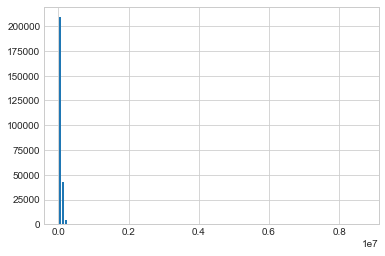

In [73]:
df['annual_income'].hist(bins=100, rwidth=0.5)

In [74]:
miss()

months_since_last_delinquent    140383
bankruptcies                       529
tax_liens                           23
dtype: int64

### Months Since Last Delinquent

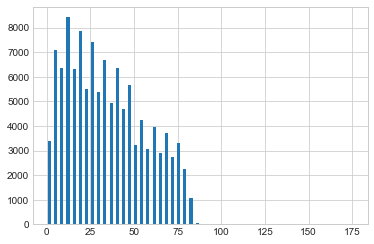

In [75]:
df['months_since_last_delinquent'].hist(bins=50, rwidth=0.5)

In [76]:
df['months_since_last_delinquent'].agg(('min', 'max', 'mean', 'median'))

min         0.00000
max       176.00000
mean       34.88145
median     32.00000
Name: months_since_last_delinquent, dtype: float64

In [77]:
df.groupby('number_of_credit_problems')['months_since_last_delinquent'].median()

number_of_credit_problems
0     31.0
1     39.0
2     41.0
3     42.0
4     38.5
5     41.0
6     41.0
7     31.0
8     26.0
9     63.5
10    17.0
11     1.0
Name: months_since_last_delinquent, dtype: float64

In [78]:
df['months_since_last_delinquent'] = df.groupby('number_of_credit_problems')['months_since_last_delinquent']\
.transform(lambda x: x.fillna(x.median()))

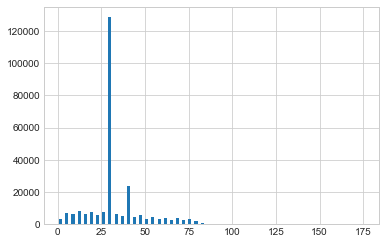

In [79]:
df['months_since_last_delinquent'].hist(bins=50, rwidth=0.5)

In [80]:
miss()

bankruptcies    529
tax_liens        23
dtype: int64

### Bankruptcies

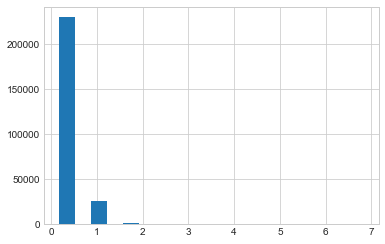

In [81]:
df['bankruptcies'].hist(bins=10, rwidth=0.5)

In [82]:
df['bankruptcies'].agg(('min', 'max', 'mean', 'median'))

min       0.000000
max       7.000000
mean      0.110316
median    0.000000
Name: bankruptcies, dtype: float64

In [83]:
df.groupby('number_of_credit_problems')['bankruptcies'].median()

number_of_credit_problems
0     0.0
1     1.0
2     1.0
3     1.0
4     0.0
5     0.0
6     0.0
7     1.0
8     0.5
9     0.0
10    0.5
11    0.0
Name: bankruptcies, dtype: float64

In [84]:
df['bankruptcies'] = df.groupby('number_of_credit_problems')['bankruptcies'].transform(lambda x: x.fillna(x.median()))

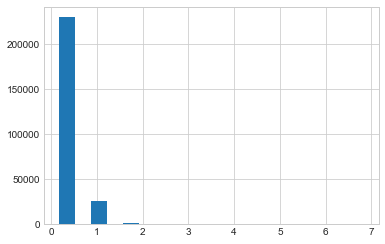

In [85]:
df['bankruptcies'].hist(bins=10, rwidth=0.5)

In [86]:
miss()

tax_liens    23
dtype: int64

### Tax Liens

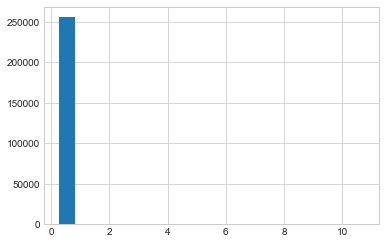

In [87]:
df['tax_liens'].hist(rwidth=0.5)

In [88]:
df['tax_liens'].agg(('min', 'max', 'mean', 'median'))

min        0.000000
max       11.000000
mean       0.027203
median     0.000000
Name: tax_liens, dtype: float64

In [89]:
df.groupby('number_of_credit_problems')['tax_liens'].median()

number_of_credit_problems
0      0.0
1      0.0
2      0.0
3      2.0
4      3.0
5      4.0
6      5.5
7      6.0
8      7.0
9      9.0
10     9.5
11    11.0
Name: tax_liens, dtype: float64

In [90]:
df['tax_liens'] = df.groupby('number_of_credit_problems')['tax_liens'].transform(lambda x: x.fillna(x.median()))

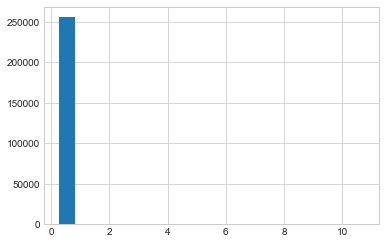

In [91]:
df['tax_liens'].hist(rwidth=0.5)

In [92]:
miss()

Series([], dtype: int64)

### Maximum Open Credit

In [93]:
df['maximum_open_credit'].head()

0    16056
1    19149
2    28335
3    43915
4    37081
Name: maximum_open_credit, dtype: object

In [94]:
df[df['maximum_open_credit']=='#VALUE!']

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
184662,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,0,1470,1,725.0,2.0,rent,58614.0,debt_consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
184663,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,0,1470,1,725.0,2.0,rent,39200.0,debt_consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
187512,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,0,23897,0,697.0,7.0,home_mortgage,49785.0,home_improvements,1306.86,13.0,31.0,6,0,0,#VALUE!,0.0,0.0
187513,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,0,23897,0,697.0,7.0,home_mortgage,49785.0,home_improvements,1306.86,13.0,31.0,6,0,0,#VALUE!,0.0,0.0


In [95]:
df[(df.current_credit_balance==0) & (df.number_of_credit_problems==0)]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
99,001a7d12-c42a-4f4d-967b-b2feb7a3977e,a93095dd-ed50-4a22-96cd-0d57a1ea1fd3,1,1973,1,743.0,9.0,rent,39456.0,other,312.69,14.7,31.0,3,0,0,0,0.0,0.0
231,003aa7af-942c-43d9-bfbe-2e4bf6e7a39d,4df000b6-3859-480e-8c16-00906d9069a4,1,21197,1,731.0,10.0,rent,69317.0,debt_consolidation,568.09,18.2,24.0,5,0,0,0,0.0,0.0
368,005aeeb9-043c-4845-9649-506f556c1c83,98075e8d-1322-4145-9234-a462566266b7,1,5007,1,734.0,9.0,rent,45063.0,buy_house,443.12,13.4,4.0,10,0,0,0,0.0,0.0
472,0076f0b7-ccc0-403b-ba03-82059eac5b8b,720ac329-ed4a-4119-9e29-0f09049ac8a1,1,4902,1,746.0,10.0,home_mortgage,117636.0,home_improvements,672.49,22.6,31.0,4,0,0,0,0.0,0.0
731,00ba667e-2a03-4f9e-9379-d622ce80bea5,d00ceb42-6f95-4b9d-8efa-281e7c1f4678,1,16790,1,739.0,10.0,home_mortgage,86348.0,debt_consolidation,1093.74,30.4,48.0,13,0,0,0,0.0,0.0
857,00dfdc12-0f91-4634-806b-f0ce0777cff8,b3bc7125-830d-42ca-9ec6-9ca790677191,1,5985,1,725.0,3.0,rent,58948.0,other,0.00,20.0,3.0,2,0,0,0,0.0,0.0
1313,014e90ac-25d0-439f-8d08-4be4c83b2332,de24fe2f-9dc6-439a-9d8d-c668438634c5,1,9779,1,725.0,10.0,home_mortgage,97790.0,business_loan,0.00,16.7,31.0,4,0,0,0,0.0,0.0
1428,016d6437-79b8-4376-85e3-afa358415b72,741eee6d-20f1-4b24-9933-3fb6c0377b6d,1,99999999,1,744.0,5.0,rent,41705.0,other,695.78,16.7,31.0,2,0,0,0,0.0,0.0
1706,01be6ab8-057a-4feb-b2e0-a3cb0c832b7e,1a84d1d6-6060-4db7-ba57-1b7c5b57d8d9,1,99999999,1,741.0,10.0,home_mortgage,202420.0,home_improvements,899.08,18.6,28.0,6,0,0,0,0.0,0.0
2295,025e7e23-283b-431c-8d0b-a7d9afe6b165,d5d02121-8984-4a94-af47-e29c3cc814d6,1,5526,1,725.0,3.0,rent,58948.0,debt_consolidation,119.73,12.3,56.0,2,0,0,0,0.0,0.0


In [96]:
df['maximum_open_credit'].replace('#VALUE!', '0', inplace=True)

In [97]:
df['maximum_open_credit'] = df['maximum_open_credit'].astype(int)

## Remove Duplicate Rows

In [98]:
df[df.duplicated(keep=False)]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,0,17961,1,701.0,0.0,own_home,53053.0,debt_consolidation,596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,0,17961,1,701.0,0.0,own_home,53053.0,debt_consolidation,596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
18,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,0,11604,1,729.0,6.0,home_mortgage,35315.0,debt_consolidation,662.16,15.0,31.0,12,0,17092,20743,0.0,0.0
19,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,0,11604,1,729.0,6.0,home_mortgage,35315.0,debt_consolidation,662.16,15.0,31.0,12,0,17092,20743,0.0,0.0
31,0006572c-9567-484d-b49b-bfe06536aa96,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,0,14727,1,740.0,3.0,home_mortgage,70690.0,debt_consolidation,1083.91,18.0,27.0,12,0,43375,225911,0.0,0.0
32,0006572c-9567-484d-b49b-bfe06536aa96,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,0,14727,1,740.0,3.0,home_mortgage,70690.0,debt_consolidation,1083.91,18.0,27.0,12,0,43375,225911,0.0,0.0
36,000795b0-d767-42bf-837a-80d5b78c1e50,b533c78c-3096-4914-acb1-5453c0ff76a4,0,19731,0,623.0,3.0,rent,43846.0,buy_house,738.08,16.2,55.0,13,1,9031,17955,1.0,0.0
37,000795b0-d767-42bf-837a-80d5b78c1e50,b533c78c-3096-4914-acb1-5453c0ff76a4,0,19731,0,623.0,3.0,rent,43846.0,buy_house,738.08,16.2,55.0,13,1,9031,17955,1.0,0.0
39,0008a65c-3054-4b5d-931d-8352021f813d,04513d99-d809-4eb6-b4bb-6abc767d861e,0,7066,1,741.0,10.0,own_home,60564.0,debt_consolidation,706.58,14.6,56.0,4,0,6229,9242,0.0,0.0
40,0008a65c-3054-4b5d-931d-8352021f813d,04513d99-d809-4eb6-b4bb-6abc767d861e,0,7066,1,741.0,10.0,own_home,60564.0,debt_consolidation,706.58,14.6,56.0,4,0,6229,9242,0.0,0.0


In [99]:
df = df.drop_duplicates(subset='loan_id')

In [100]:
df[df.duplicated(keep=False)]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


## Create Dummy Variables

In [101]:
data = df.copy()

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
loan_id                         215700 non-null object
customer_id                     215700 non-null object
loan_status                     215700 non-null int64
current_loan_amount             215700 non-null int64
term                            215700 non-null int64
credit_score                    215700 non-null float64
years_in_current_job            215700 non-null float64
home_ownership                  215700 non-null object
annual_income                   215700 non-null float64
purpose                         215700 non-null object
monthly_debt                    215700 non-null float64
years_of_credit_history         215700 non-null float64
months_since_last_delinquent    215700 non-null float64
number_of_open_accounts         215700 non-null int64
number_of_credit_problems       215700 non-null int64
current_credit_balance          215700 non-null int64
maximum_o

In [103]:
data0 = data.drop(['loan_id', 'customer_id', 'loan_status'], axis=1)

In [104]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 16 columns):
current_loan_amount             215700 non-null int64
term                            215700 non-null int64
credit_score                    215700 non-null float64
years_in_current_job            215700 non-null float64
home_ownership                  215700 non-null object
annual_income                   215700 non-null float64
purpose                         215700 non-null object
monthly_debt                    215700 non-null float64
years_of_credit_history         215700 non-null float64
months_since_last_delinquent    215700 non-null float64
number_of_open_accounts         215700 non-null int64
number_of_credit_problems       215700 non-null int64
current_credit_balance          215700 non-null int64
maximum_open_credit             215700 non-null int32
bankruptcies                    215700 non-null float64
tax_liens                       215700 non-null float64
dtypes:

In [105]:
dum = pd.get_dummies(data0, drop_first=True)
dum.head()

,current_loan_amount,term,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,...,home_ownership_own_home,home_ownership_rent,purpose_buy_a_car,purpose_buy_house,purpose_debt_consolidation,purpose_educational_expenses,purpose_home_improvements,purpose_medical_bills,purpose_other,purpose_take_a_trip
0,11520,1,741.0,10.0,33694.0,584.03,12.3,41.0,10,0,...,0,0,0,0,1,0,0,0,0,0
1,3441,1,734.0,4.0,42269.0,1106.04,26.3,31.0,17,0,...,0,0,0,0,0,0,0,0,1,0
2,21029,1,747.0,10.0,90126.0,1321.85,28.8,31.0,5,0,...,0,0,0,0,1,0,0,0,0,0
3,18743,1,747.0,10.0,38072.0,751.92,26.2,31.0,9,0,...,1,0,0,0,1,0,0,0,0,0
4,11731,1,746.0,4.0,50025.0,355.18,11.5,31.0,12,0,...,0,1,0,0,1,0,0,0,0,0


In [106]:
dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 24 columns):
current_loan_amount             215700 non-null int64
term                            215700 non-null int64
credit_score                    215700 non-null float64
years_in_current_job            215700 non-null float64
annual_income                   215700 non-null float64
monthly_debt                    215700 non-null float64
years_of_credit_history         215700 non-null float64
months_since_last_delinquent    215700 non-null float64
number_of_open_accounts         215700 non-null int64
number_of_credit_problems       215700 non-null int64
current_credit_balance          215700 non-null int64
maximum_open_credit             215700 non-null int32
bankruptcies                    215700 non-null float64
tax_liens                       215700 non-null float64
home_ownership_own_home         215700 non-null uint8
home_ownership_rent             215700 non-null uint8
purpose_b

# Modeling

## Train Test Split

In [107]:
X = dum
y = df['loan_status']

In [108]:
Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size=0.2, random_state=25)

## Algorithms

In [109]:
kn = neighbors.KNeighborsClassifier(15,weights='uniform')
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=10)
gb = GradientBoostingClassifier()

In [110]:
ss = [kn, lr, dt, rf, gb]
name = ['K Neighbors', 'Logisitic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for i in range(len(ss)):
    ss[i] = ss[i].fit(Xtrain, ytrain)
    print(name[i])
    print('Accuracy of train is', ss[i].score(Xtrain, ytrain))
    print('Accuracy of test is', ss[i].score(Xtest, ytest))
    print('Difference is', ((ss[i].score(Xtrain, ytrain)) - ss[i].score(Xtest, ytest))*100)
    score = cvs(ss[i], X, y, cv=5)
    print('Scores for algorithm:', score)
    print(' ')

K Neighbors
Accuracy of train is 0.819917709782
Accuracy of test is 0.809179415855
Difference is 1.07382939268
Scores for algorithm: [ 0.80909112  0.81140473  0.80950394  0.80945758  0.80910545]
 
Logisitic Regression
Accuracy of train is 0.817408437645
Accuracy of test is 0.814534075104
Difference is 0.287436254057
Scores for algorithm: [ 0.81683317  0.81682893  0.81682893  0.81682893  0.81684786]
 
Decision Tree
Accuracy of train is 1.0
Accuracy of test is 0.729670839128
Difference is 27.0329160872
Scores for algorithm: [ 0.72754456  0.73280019  0.72786277  0.73110802  0.72982684]
 
Random Forest
Accuracy of train is 0.992883634678
Accuracy of test is 0.791956420955
Difference is 20.0927213723
Scores for algorithm: [ 0.79038502  0.79153917  0.79299954  0.79160872  0.79028257]
 
Gradient Boosting
Accuracy of train is 0.819268660176
Accuracy of test is 0.81495132128
Difference is 0.431733889662
Scores for algorithm: [ 0.81787627  0.81805749  0.81766342  0.81877608  0.81791418]
 


In [111]:
res = gb.predict(X) # Surprise, surprise... Gradient Boosting is the best

In [112]:
featimport = pd.DataFrame(gb.feature_importances_, index = X.columns, columns=['importance'])\
                        .sort_values('importance', ascending = False)

In [113]:
featimport.head(10)

,importance
current_loan_amount,0.210507
credit_score,0.140795
annual_income,0.131055
maximum_open_credit,0.126890
current_credit_balance,0.097397
years_of_credit_history,0.059660
monthly_debt,0.046074
term,0.042503
number_of_open_accounts,0.034640
home_ownership_rent,0.032612


In [114]:
featimport.to_csv('Feature Importance.csv', header=True, index=False)

In [114]:
submit = pd.DataFrame(columns = ['Customer ID', 'Loan Status'])
submit

,Customer ID,Loan Status


In [115]:
submit['Customer ID'] = df['customer_id']

In [116]:
submit['Loan Status'] = res

In [117]:
submit.head()

,Customer ID,Loan Status
0,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1
1,927b388d-2e01-423f-a8dc-f7e42d668f46,1
2,defce609-c631-447d-aad6-1270615e89c4,1
3,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1
4,dde79588-12f0-4811-bab0-e2b07f633fcd,1
